In [1]:
pip install fredapi

  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/96/d4/f81fa9f67775a6a4b9e2cd8487239d61a9698cb2b9c02a5a2897d310f7a4/fredapi-0.5.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fredapi import Fred
from sklearn.linear_model import LinearRegression

## 2 Time Series Investigation of Bitcoin Price

### 2.1 Obtain Time Series Data

In [55]:
#Question 2.1

#set up the API key to be called using "fred"

fred = Fred(api_key='18207b6faaaf373e4cdb411484dfbfff')

#provide plots of three time series, one for a high risk crypto, a safe asset and an index measure

Bitcoin = fred.get_series('CBBTCUSD')
Gold = fred.get_series('ID7108')
SP500 = fred.get_series('SP500')

#test that it works
print(Bitcoin)
print(Gold)
print(SP500)

2014-12-01      370.00
2014-12-02      378.00
2014-12-03      378.00
2014-12-04      377.10
2014-12-05         NaN
                ...   
2024-01-09    46103.00
2024-01-10    46590.34
2024-01-11    46324.98
2024-01-12    42797.41
2024-01-13    42829.80
Length: 3331, dtype: float64
2001-12-01    100.0
2002-01-01     99.8
2002-02-01    101.8
2002-03-01    106.8
2002-04-01    106.4
              ...  
2023-07-01    695.7
2023-08-01    706.5
2023-09-01    697.6
2023-10-01    661.6
2023-11-01    721.1
Length: 264, dtype: float64
2014-01-13    1819.20
2014-01-14    1838.88
2014-01-15    1848.38
2014-01-16    1845.89
2014-01-17    1838.70
               ...   
2024-01-08    4763.54
2024-01-09    4756.50
2024-01-10    4783.45
2024-01-11    4780.24
2024-01-12    4783.83
Length: 2610, dtype: float64


Text(0, 0.5, 'Price')

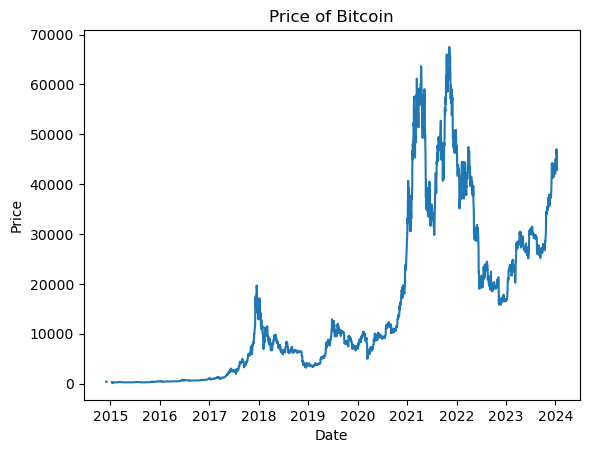

In [98]:
#plot the price of Bitcoin making sure to label the axis

plt.plot(Bitcoin, label='Bitcoin')
plt.title('Price of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

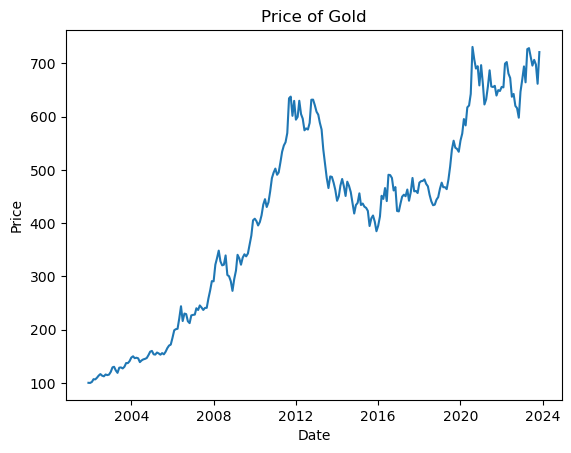

In [99]:
#plot the price of Gold making sure to label the axis

plt.plot(Gold, label='Gold')
plt.title('Price of Gold')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Index')

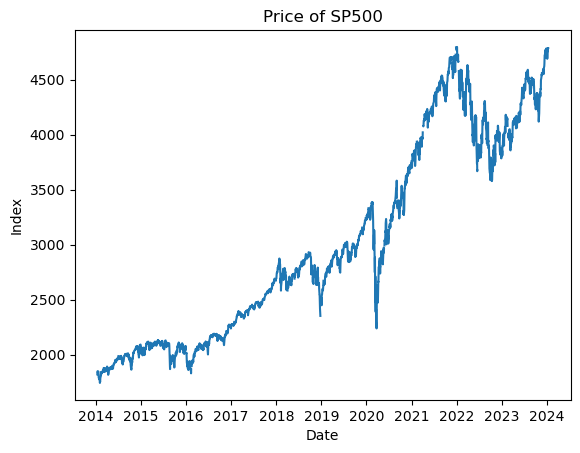

In [100]:
#plot the price of SP500 making sure to label the axis

plt.plot(SP500, label='SP500')
plt.title('Price of SP500')
plt.xlabel('Date')
plt.ylabel('Index')

### 2.2 Data Transformation 

In [101]:
#combine all 3 data series into one dataframe making sure to choose the longest time span to conduct the analysis 

all_data = pd.concat([Bitcoin, Gold, SP500], axis=1)
all_data.columns = ['Bitcoin', 'Gold', 'SP500']
all_data = all_data.loc['2015':'2023']

#make sure missing values are filled 
all_data.fillna(method='ffill' , inplace = True)

#calculate log returns
transform_data = np.log(all_data / all_data.shift(1))

#remove first row as it comes back as "NaN" (Not a number)
transform_data = transform_data.dropna()

#print to check its working

print(all_data)

print(transform_data)

             Bitcoin   Gold    SP500
2015-01-01       NaN  438.0      NaN
2015-01-02       NaN  438.0  2058.20
2015-01-03       NaN  438.0  2058.20
2015-01-04       NaN  438.0  2058.20
2015-01-05       NaN  438.0  2020.58
...              ...    ...      ...
2023-12-27  43444.45  721.1  4781.58
2023-12-28  42613.04  721.1  4783.35
2023-12-29  42056.30  721.1  4769.83
2023-12-30  42164.76  721.1  4769.83
2023-12-31  42300.78  721.1  4769.83

[3287 rows x 3 columns]
             Bitcoin  Gold     SP500
2015-01-09  0.000000   0.0 -0.008439
2015-01-10  0.000000   0.0  0.000000
2015-01-11  0.000000   0.0  0.000000
2015-01-12  0.000000   0.0 -0.008127
2015-01-13 -0.105710   0.0 -0.002582
...              ...   ...       ...
2023-12-27  0.021502   0.0  0.001429
2023-12-28 -0.019323   0.0  0.000370
2023-12-29 -0.013151   0.0 -0.002830
2023-12-30  0.002576   0.0  0.000000
2023-12-31  0.003221   0.0  0.000000

[3279 rows x 3 columns]


### 2.3 Data Analysis 

In [102]:
#set a risk-free rate. the risk-free rate is the interest rate without any risk of loss. 
#according to Coindesk (2023) the current risk-free rate for Bitcoin is 4.2%

risk_free_rate = 0.042

#calculate how much more Bitcoin and the S&P 500 return compared to the safe rate.
#subtract the risk-free rate from the Bitcoin and S&P 500 returns.
excess_returns_bitcoin = data_returns['Bitcoin'] - risk_free_rate
excess_returns_market = data_returns['S&P 500'] - risk_free_rate

#add a constant to our market returns
x = sm.add_constant(excess_returns_market)

#set up our model using Bitcoins excess returns as 'y' and the market's excess returns as 'x'
y = excess_returns_bitcoin
CAPM = sm.OLS(y, x)

#run the model and get the results
CAPM_results = CAPM.fit()

#print out a summary of our model to make sure it works
print(CAPM_results.summary())



                            OLS Regression Results                            
Dep. Variable:                Bitcoin   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           4.96e-26
Time:                        03:58:27   Log-Likelihood:                 5992.1
No. Observations:                3330   AIC:                        -1.198e+04
Df Residuals:                    3328   BIC:                        -1.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0084      0.003     -2.709      0.0


 ### CAPM interpretations


CAPM stands for Capital Asset Pricing Model. CAPM is a financial model that is used to describe the relationship between systematic risk and expected return on an asset (Cautero, 2020). It is often used to estimate the return on an investment.

The CAPM analysis for Bitcoin has yielded some interesting insights. The alpha ($ a $) of the model is -0.0884 which means that Bitcoin has been underperforming when being compared to a risk-free investment over the period studied. This negative figure shows that Bitcoin has provided a lower return than the risk-free rate. The beta ($ b $) result is 0.7706. In this case, when the Beta is less than 1 it means that the Bitcoin is less volatile than the overall market. This goes against the common belief that Bitcoin is a risky investment. This shows that during the frame of the analysis Bitcoin experienced less risk than is typically assumed.

The R-Squared value of 0.033 implies that the market index does not significantly influence bitcoins returns meaning that there may be other factors which are impacting it. These factors have not bee captured in the analysis. The F - statistic of the model is very important, with it being 113.3 it suggests that the relationship between Bitcoin and the S&P 500 index is statistically significant despite the low R-squared value.

The CAPM analysis shows that Bitcoin has not performed in line with the models risk-return tradeoff expectation and that the low volatility relative to the market points towards Bitcoins unique characteristics of a cryptocurrency as an investment. It is important for people looking to invest into Bitcoin to consider factors beyond the market movements. 







# References

coindesk. (2023, December 4). Bitcoin Market-Neutral Bets Offer 10% Return as BTC Tops $41K, Analysts Say. Www.coindesk.com. https://www.coindesk.com/markets/2023/12/04/bitcoin-market-neutral-bets-offer-10-return-as-btc-tops-41k-analysts-say/#:~:text=Currently%2C%20the%20futures%20basis%20is

Cautero, R. (2020, July 23). The Capital Asset Pricing Model (CAPM), Explained. SmartAsset. https://smartasset.com/investing/capital-asset-pricing-model

